<hr>
<h3>ALLLife Bank Credit Card Customer Segmentation</h3>
<hr>

<b>Background</b>: AllLife Bank wants to focus on its credit card customer base in the next financial year. They have been advised by their marketing research team, that the penetration in the market can be improved. Based on this input, the Marketing team proposes to run personalised campaigns to target new customers as well as upsell to existing customers. Another insight from the market research was that the customers perceive the support services of the back poorly. Based on this, the Operations team wants to upgrade the service delivery model, to ensure that customers queries are resolved faster. Head of Marketing and Head of Delivery both decide to reach out to the Data Science team for help.

<b>Data Description</b>: Data is of various customers of a bank with their credit limit, the total number of credit cards the customer has, and different channels through which customer has contacted the bank for any queries, different channels include visiting the bank, online and through a call centre. 

<b>Key Questions:</b> 
1. How many different segments of customers are there?
2. How are these segments different from each other?
3. What are your recommendations to the bank on how to better market to and service these customers?

### Importing the Libraries

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import pandas as pd

from sklearn.preprocessing import StandardScaler

import seaborn as sns 
import matplotlib.pyplot as plt

from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans
import numpy as np 

from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import dendrogram, linkage,cophenet

In [ ]:
#Reading the dataset 

df=pd.read_excel('Credit Card Customer Data.xlsx')

In [ ]:
#Viewing top 2 rows 

df.head(2)

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9


The cols : Sl_No and CustomerKey are IDs which can be eliminated as they are unique and will not have any relevant role in forming the clusters so we remove them

In [ ]:
features=['Avg_Credit_Limit','Total_Credit_Cards','Total_visits_bank','Total_visits_online','Total_calls_made']

In [ ]:
subset=df[features]  #Selecting only the above columns 

### EDA 

#### Checking for Missing Values 

In [ ]:
subset.isna().sum() 

Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

No missing values were found 

#### Checking for the statistically summary 

In [ ]:
subset.describe()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
count,660.000000,660.000000,660.000000,660.000000,660.000000
mean,34574.242424,4.706061,2.403030,2.606061,3.583333
std,37625.487804,2.167835,1.631813,2.935724,2.865317
min,3000.000000,1.000000,0.000000,0.000000,0.000000
25%,10000.000000,3.000000,1.000000,1.000000,1.000000
50%,18000.000000,5.000000,2.000000,2.000000,3.000000
75%,48000.000000,6.000000,4.000000,4.000000,5.000000
max,200000.000000,10.000000,5.000000,15.000000,10.000000


STandardize the dataset as the range of all the columns look different from each other



#### Standard Scaler ( Z Score )

In [ ]:
scaler=StandardScaler()
subset_scaled=scaler.fit_transform(subset)   

In [ ]:
subset_scaled_df=pd.DataFrame(subset_scaled,columns=subset.columns)   #Creating a dataframe of the above results

### Data Visualizations 

#### HeatMap :  To check for correlated features 

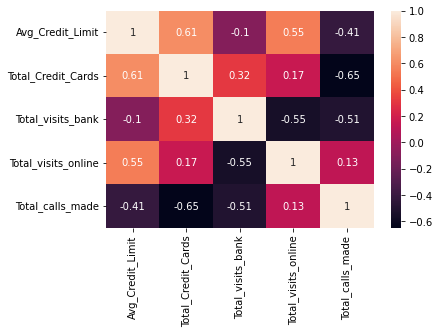

In [ ]:
sns.heatmap(subset_scaled_df.corr(),annot=True)
plt.show()

There is no significant correlation observed among the different features 

#### Elbow Plot

1 0.864470869137024
For n_clusters = 1 The average WCSS is : 3300.0
2 0.864470869137024
For n_clusters = 2 The average WCSS is : 2040.989816478495
3 0.864470869137024
For n_clusters = 3 The average WCSS is : 933.0437490000535
4 0.864470869137024
For n_clusters = 4 The average WCSS is : 780.7736895551767
5 0.864470869137024
For n_clusters = 5 The average WCSS is : 704.4759188657506
6 0.864470869137024
For n_clusters = 6 The average WCSS is : 642.2851847541599
7 0.864470869137024
For n_clusters = 7 The average WCSS is : 600.2497728911784
8 0.864470869137024
For n_clusters = 8 The average WCSS is : 563.3799171776227
9 0.864470869137024
For n_clusters = 9 The average WCSS is : 535.7462662559637


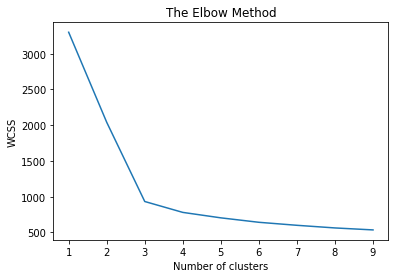

In [ ]:

clusters=range(1,10)
wcss=[]
for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(subset_scaled_df)
    prediction=model.predict(subset_scaled_df)
    print(k,distortion)
    print("For n_clusters =", k, "The average WCSS is :",model.inertia_)
    wcss.append(model.inertia_)
plt.plot(range(1,10),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()



Looking at the elbow method we can take K=3 , so let's apply Kmeans with k=3 


In [ ]:
kmeans = KMeans(n_clusters=3, n_init = 15, random_state=2345)
kmeans.fit(subset_scaled_df)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=15, n_jobs=None, precompute_distances='auto',
       random_state=2345, tol=0.0001, verbose=0)

In [ ]:
centroids = kmeans.cluster_centers_
print(centroids)


array([[-0.59579625, -1.05962278, -0.9015185 ,  0.32299678,  1.14810882],
       [-0.02106178,  0.37368962,  0.6663945 , -0.55367163, -0.55300488],
       [ 2.83176409,  1.86222621, -1.10576269,  2.82731942, -0.87432983]])

In [ ]:
centroid_df = pd.DataFrame(centroids, columns = subset_scaled_df.columns )

In [ ]:
centroid_df

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,-0.595796,-1.059623,-0.901518,0.322997,1.148109
1,-0.021062,0.373690,0.666395,-0.553672,-0.553005
2,2.831764,1.862226,-1.105763,2.827319,-0.874330


The above are the centroids for the different clusters 

#### Adding Label to the dataset

In [ ]:
dataset=subset_scaled_df[:]  #creating a copy of the data 

In [ ]:
dataset['KmeansLabel']=kmeans.labels_

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
dataset.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,KmeansLabel
0,1.740187,-1.249225,-0.860451,-0.547490,-1.251537,1
1,0.410293,-0.787585,-1.473731,2.520519,1.891859,0
2,0.410293,1.058973,-0.860451,0.134290,0.145528,1
3,-0.121665,0.135694,-0.860451,-0.547490,0.145528,1
4,1.740187,0.597334,-1.473731,3.202298,-0.203739,2


### Visualizing the clusters

#### Since the number of dimensions is 5 in the dataset , it is not possible to create 5-d Visualization so we can take any 2 random features and make a scatter plot observing the different  clusters 

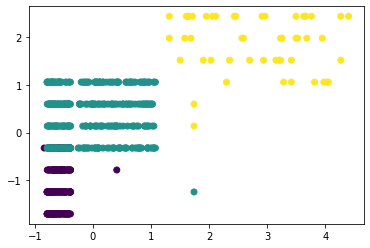

In [ ]:
plt.scatter(dataset['Avg_Credit_Limit'], dataset['Total_Credit_Cards'], c=kmeans.labels_,)  
plt.show()

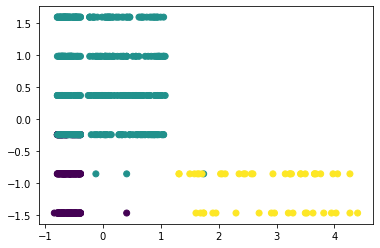

In [ ]:
plt.scatter(dataset['Avg_Credit_Limit'], dataset['Total_visits_bank'], c=kmeans.labels_,)  
plt.show()

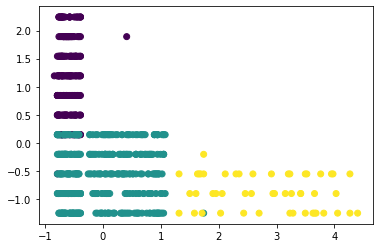

In [ ]:
plt.scatter(dataset['Avg_Credit_Limit'], dataset['Total_calls_made'], c=kmeans.labels_,)  
plt.show()

### Analyse the Clusters 

Let us make a visualization to observe the different clusters by making boxplots , 
for the clusters we expect to observe statistical properties which differentiates clusters with each other 

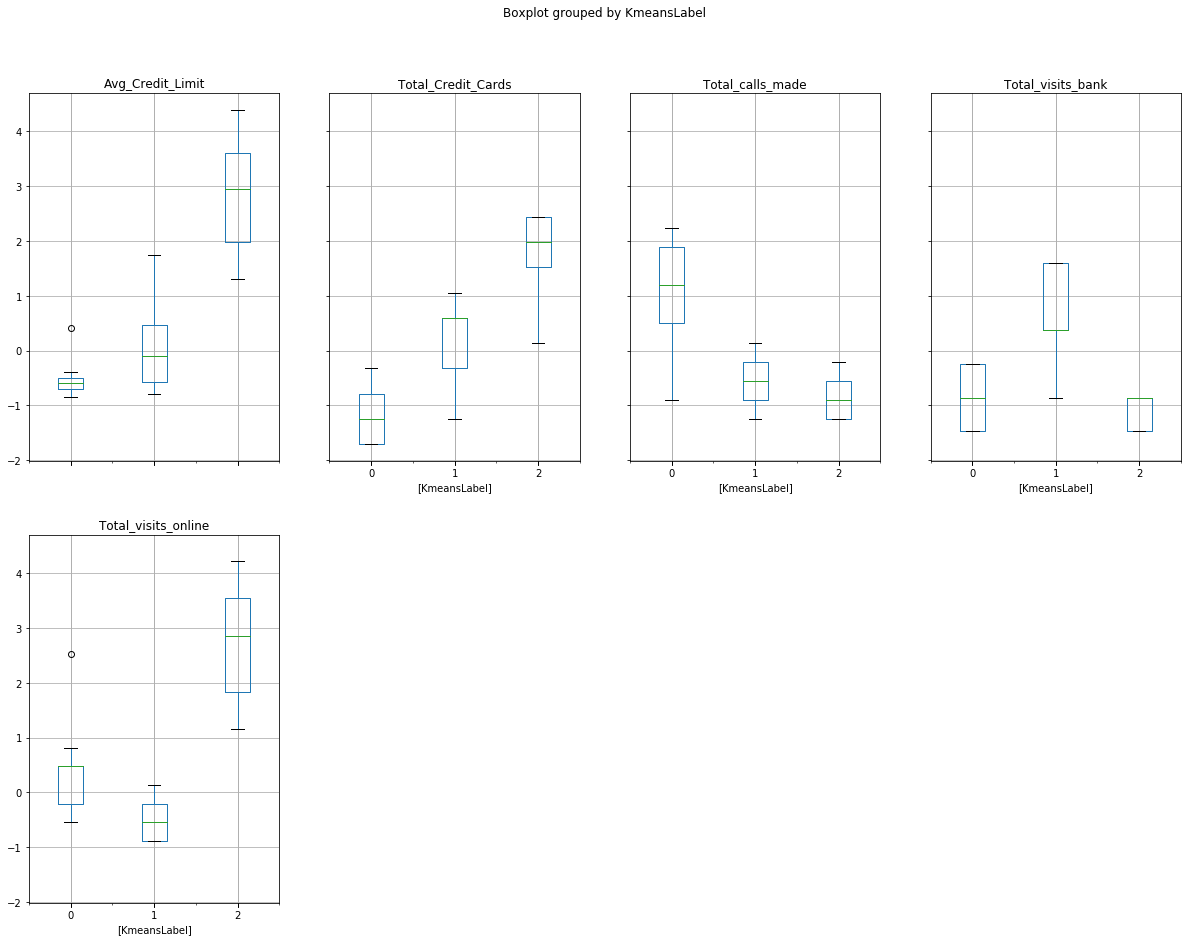

In [ ]:
dataset.boxplot(by = 'KmeansLabel',  layout=(2,4), figsize=(20, 15))
plt.show()

Looking the box plot we can observe differentiated clusters 

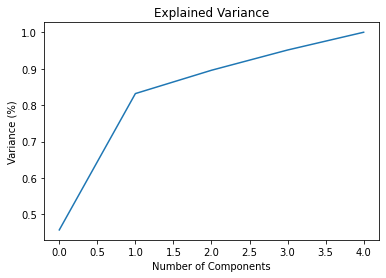

In [ ]:
from sklearn.decomposition import PCA
pca = PCA()
principalComponents = pca.fit_transform(subset_scaled_df)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Explained Variance')
plt.show()

Apply PCA and then create clusters again

In [ ]:
pca = PCA(.95)
new_data = pca.fit_transform(subset_scaled_df)
# This will be the new data fed to the algorithm.
print(new_data.shape)

(660, 4)


In [ ]:
principal_df = pd.DataFrame(data = new_data
             , columns = ['principal component 1', 'principal component 2','principal component 3','principal component 4'])
principal_df.head()

,principal component 1,principal component 2,principal component 3,principal component 4
0,0.501291,0.524829,1.895862,1.200582
1,-1.459560,3.105588,-0.906802,0.411052
2,0.525795,0.823979,0.089030,-1.033119
3,-0.362294,0.128123,0.558215,-0.729885
4,1.266228,3.668708,-0.099999,0.505571


For n_clusters = 1 The average WCSS is : 3139.0025494696447
For n_clusters = 2 The average WCSS is : 1880.5064880158084
For n_clusters = 3 The average WCSS is : 773.7281632647084
For n_clusters = 4 The average WCSS is : 624.315704719866
For n_clusters = 5 The average WCSS is : 555.0615396552112
For n_clusters = 6 The average WCSS is : 511.1529610755921
For n_clusters = 7 The average WCSS is : 469.069705537037
For n_clusters = 8 The average WCSS is : 440.0508098472978
For n_clusters = 9 The average WCSS is : 411.49873873646936


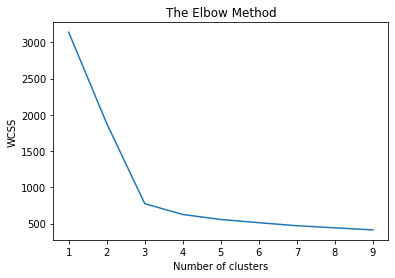

In [ ]:
clusters=range(1,10)
wcss=[]
for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(principal_df)
    prediction=model.predict(principal_df)
    print("For n_clusters =", k, "The average WCSS is :",model.inertia_)
    wcss.append(model.inertia_)
plt.plot(range(1,10),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=3, n_init = 15, random_state=2345)
kmeans.fit(principal_df)
centroids = kmeans.cluster_centers_
print(centroids)
centroid_df2 = pd.DataFrame(centroids, columns = principal_df.columns )
centroid_df2

[[-1.78327911  0.72807864 -0.01511958  0.03259256]
 [ 0.64727875 -0.88000892  0.02413273 -0.03279632]
 [ 2.99209845  3.53187654 -0.11856894  0.10717292]]


,principal component 1,principal component 2,principal component 3,principal component 4
0,-1.783279,0.728079,-0.015120,0.032593
1,0.647279,-0.880009,0.024133,-0.032796
2,2.992098,3.531877,-0.118569,0.107173


In [ ]:
principal_df['KmeansLabel']=kmeans.labels_
principal_df.head()

,principal component 1,principal component 2,principal component 3,principal component 4,KmeansLabel
0,0.501291,0.524829,1.895862,1.200582,1
1,-1.459560,3.105588,-0.906802,0.411052,0
2,0.525795,0.823979,0.089030,-1.033119,1
3,-0.362294,0.128123,0.558215,-0.729885,1
4,1.266228,3.668708,-0.099999,0.505571,2


Applying PCA is also yielding 3 clusters ,SO We are fine to go with K Means approach.

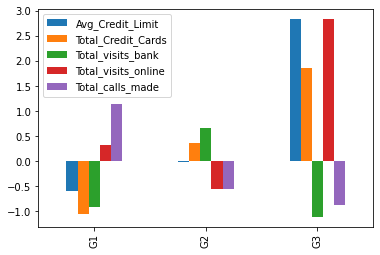

In [ ]:
Kmeans_results=dataset.groupby('KmeansLabel').mean()
Kmeans_results.index=['G1','G2','G3']
Kmeans_results.plot.bar()


## Cluster Profiles and Marketing Recommendation

Since applying PCA are not giving different clusters so we can assign labels from K Means to the original (non scaled) data  to analyse clusters profiles
( here we are assigning labels of Kmeans , same could be done using hierarchical labels) 

In [ ]:
subset['KmeansLabel']=dataset['KmeansLabel']
subset.head()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,KmeansLabel
0,100000,2,1,1,0,1
1,50000,3,0,10,9,0
2,50000,7,1,3,4,1
3,30000,5,1,1,4,1
4,100000,6,0,12,3,2


#### Understanding each feature characterstics within different clusters 

In [ ]:
for each in features:
    print (each)
    print ( subset.groupby('KmeansLabel').describe().round()[each][['count','mean','min','max']])
    
    print ("\n\n")
    
    

Avg_Credit_Limit
             count      mean      min       max
KmeansLabel                                    
0            224.0   12174.0   3000.0   50000.0
1            386.0   33782.0   5000.0  100000.0
2             50.0  141040.0  84000.0  200000.0



Total_Credit_Cards
             count  mean  min   max
KmeansLabel                        
0            224.0   2.0  1.0   4.0
1            386.0   6.0  2.0   7.0
2             50.0   9.0  5.0  10.0



Total_visits_bank
             count  mean  min  max
KmeansLabel                       
0            224.0   1.0  0.0  2.0
1            386.0   3.0  1.0  5.0
2             50.0   1.0  0.0  1.0



Total_visits_online
             count  mean  min   max
KmeansLabel                        
0            224.0   4.0  1.0  10.0
1            386.0   1.0  0.0   3.0
2             50.0  11.0  6.0  15.0



Total_calls_made
             count  mean  min   max
KmeansLabel                        
0            224.0   7.0  1.0  10.0
1            3

####Cluster Profiles
  
**Label 0 can be considered low valued customers**
   
    This group comprises of about 34% of the customers ( 224/660 )
    Lowest Average Credit Limit and make many customer care calls
    



**Label 1 can be considered medium valued customers** 
    
    This group forms the majority of the customers having about 58% customers in total  ( 386/660 )
    These customers have  "Avg_Credit_Limit " ranging from 5000.0 to 100000.0 
    
    These are the ones which make the maximum number of visits to the bank as the average visits to bank is 3.
    
    They are the ones who are least active online as the maximum visit onine is just 3



**Label 2 can be considered  high value customers** 
    
    These are the least in number i.e. only 50 customers comprising 7.5% of total customers (50/660) .
    
    These customers have a minimum "Avg_Credit_Limit " of 84000 and have atleast 5 Credit cards .
    
    These are the ones which make the minimum number of visits to the bank as the maximum visit to bank is 1 amongst all 50     customers.
    
    They are mostly using online services as the average visit online is 11. 




####Recommendation

1. Customers in the medium group ( having Label 1 ) are not engaged much in online activities , one of the exercise can be to engage them online. If they join online , promotions and offers can be communicated to them with much ease.



2. Customers in low group ( label 0 ) can further be binned to check if there are any extreme groups having high average credit limit.These customers can be given more offers and new credit cards so that we can have them in medium group (label 1 )  over a period of time. Similarly we can perform this for medium customers (label 1)  and try to have them in high group (label 2) over a period of time .



3. Customers in low group ( label 0 ) make the most number of customer care calls, these customers can be told about different offers to try and move them to  medium group over a period of time .
